# Mount Google Drive, install langchain and do all the imports

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%bash
# pip install -qqq -U langchain-huggingface
pip install -qqq -U langchain
pip install -qqq -U langchain-community
pip install -qqq -U faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.6/990.6 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.9/379.9 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 62.6 MB/s eta 0:00:00


In [ ]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from langchain.vectorstores import FAISS

# Define my own Embeddings Class

In [ ]:
#Definition of my Embeddings class
# langchain_core.embeddings.embeddings.Embeddings
from langchain_core.embeddings import Embeddings
import json

class DummyEmbeddings(Embeddings):
    def __init__(self):
        pass

    def embed_documents(self, texts):
        #list of json array strings is expected, with all json arrays having the same length.
        vectors = []
        for text in texts:
          vectors.append(json.loads(text))
        return vectors

    def embed_query(self, text):
        #json array string is expected
        return json.loads(text)

# Read the Data (a slice of swiss cheese and a slice of a random cube)

In [ ]:
#read hexgrid_data
path = '/content/drive/MyDrive/Final_Project/data/hexgrid_data.csv'
hexgrid_data = pd.read_csv(path, names= ['id', 'x', 'y'], header=0)

hexgrid_data.info()
hexgrid_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      10000 non-null  int64  
 1   x       10000 non-null  float64
 2   y       10000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


,id,x,y
0,0,0.122079,0.058797
1,1,1.165021,0.053123
2,2,2.397017,0.083524
3,3,3.236092,0.005809
4,4,4.217629,0.099702


In [ ]:
#read swiss_cheese slice data
path = '/content/drive/MyDrive/Final_Project/data/slice_of_swiss_cheese[8-25].csv'
slice_of_swiss_cheese_data = pd.read_csv(path, names= ['id', 'x', 'y'], header=0)

slice_of_swiss_cheese_data.info()
slice_of_swiss_cheese_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2486 entries, 0 to 2485
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      2486 non-null   int64  
 1   x       2486 non-null   float64
 2   y       2486 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 58.4 KB


,id,x,y
0,18,0.986006,0.145989
1,23,0.708396,0.603641
2,31,0.989866,0.592755
3,32,0.469694,0.890160
4,33,0.267618,0.219604


In [ ]:
#read random cube slice data
path = '/content/drive/MyDrive/Final_Project/data/slice_of_random_cube[28-100].csv'
slice_of_random_cube_data = pd.read_csv(path, names= ['id', 'x', 'y'], header=0)

slice_of_random_cube_data.info()
slice_of_random_cube_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1002 non-null   int64  
 1   x       1002 non-null   float64
 2   y       1002 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


,id,x,y
0,50,0.871664,0.392971
1,94,0.322777,0.589819
2,98,0.621641,0.780531
3,387,0.889984,0.526013
4,402,0.008645,0.422891


In [ ]:
hexgrid_df = hexgrid_data.copy()
# cheese_df = slice_of_swiss_cheese_data.copy()
# random_df = slice_of_random_cube_data.copy()

# Plot the Cheese Data

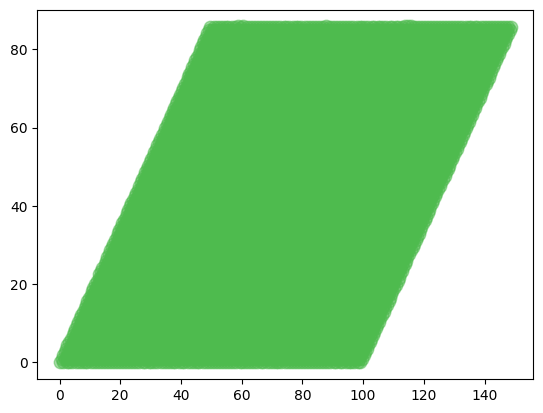

In [ ]:
#plot the hexgrid_data
color = '#4ebb4e'
df = hexgrid_df
plt.scatter(df.x, df.y, s=80, alpha = 0.5, c = color)
plt.show()

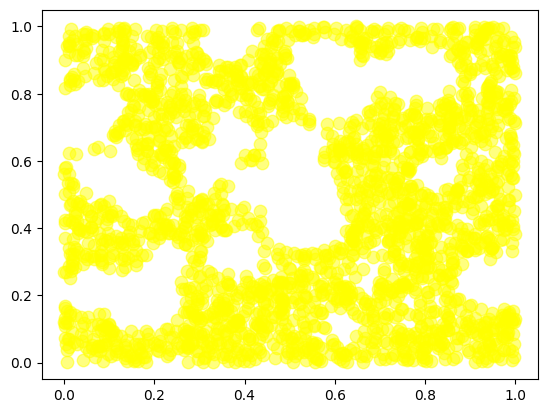

In [ ]:
#plot the slice of cheese
color = 'yellow'
df = cheese_df
plt.scatter(df.x, df.y, s=80, alpha = 0.5, c = color)
plt.show()

# Define Function to generate a set of grid-points

In [ ]:
# function to generate grid-points for similarity searches.
def generate_grid_points():
  offset_x, offset_y = 0.0, 0.0
  n = 20
  side_length = 1.15
  grid = np.empty((n*n,2))
  for i in range(n):
    for j in range(n):
      grid[n*i + j] = [offset_x + i*side_length/n, offset_y + j*side_length/n]
  return grid

## create grid and save as .csv

In [ ]:
# store grid as .csv
grid = generate_grid_points()
grid_df = pd.DataFrame(grid, columns = ['x','y'])
grid_df.head()

filename_grid = 'MyDrive/Final_Project/data/grid.csv'
path = '/content/drive/' + filename_grid
grid_df.to_csv(path)

# Read Grid Data

In [ ]:
# read grid from .csv
filename_grid = 'MyDrive/Final_Project/data/grid.csv'
path = '/content/drive/' + filename_grid
grid_df = pd.read_csv(path, names = ['id','x','y'], header=0)

grid_df.info()
grid_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      400 non-null    int64  
 1   x       400 non-null    float64
 2   y       400 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


,id,x,y
0,0,0.0,0.0000
1,1,0.0,0.0575
2,2,0.0,0.1150
3,3,0.0,0.1725
4,4,0.0,0.2300


# Plot the Grid Data and Cheese Data

In [ ]:
plt.scatter(grid_df.x, grid_df.y, c = 'lightgreen')
plt.scatter(cheese_df.x, cheese_df.y, s=80, alpha = 0.5, c = color)

NameError: name 'grid_df' is not defined

# Create FAISS Vector Stores for Cheese Data and Random Data

In [ ]:
# create embeddings
embeddings = DummyEmbeddings()

In [ ]:
#create text-embeddings pairs for the creation af a FAISS vector store
texts = hexgrid_df.id.astype(str)
vector_embeddings = hexgrid_df.loc[:,["x","y"]].to_numpy()
text_embedding_pairs = zip(texts, vector_embeddings)

In [ ]:
# create FAISS vector store with .from_embeddings() method
hexgrid_vs = FAISS.from_embeddings(text_embedding_pairs, embeddings)

In [ ]:
#create text-embeddings pairs for the creation af a FAISS vector store
texts = cheese_df.id.astype(str)
vector_embeddings = cheese_df.loc[:,["x","y"]].to_numpy()
text_embedding_pairs = zip(texts, vector_embeddings)

In [ ]:
# create FAISS vector store with .from_embeddings() method
cheese_vs = FAISS.from_embeddings(text_embedding_pairs, embeddings)

In [ ]:
#create text-embeddings pairs for the creation af a FAISS vector store
texts = random_df.id.astype(str)
vector_embeddings = random_df.loc[:,["x","y"]].to_numpy()
text_embedding_pairs = zip(texts, vector_embeddings)

In [ ]:
# create FAISS vector store with .from_embeddings() method
random_vs = FAISS.from_embeddings(text_embedding_pairs, embeddings)

## Save the hexgrid, cheese and random FAISS-Index vector_stores in project folder

In [ ]:
# Save hexgrid vector_store in project folder
path = '/content/drive/MyDrive/Final_Project/data/faiss_index_hexgrid_data'
hexgrid_vs.save_local(path)

In [ ]:
# Save cheese vector_store in project folder
path = '/content/drive/MyDrive/Final_Project/data/faiss_index_slice_of_swiss_cheese[8-25]'
cheese_vs.save_local(path)

In [ ]:
# Save random vector_store in project folder
path = '/content/drive/MyDrive/Final_Project/data/faiss_index_random'
random_vs.save_local(path)

# Function get_nearest_neighbors

In [ ]:
# function that takes query_vector and returns dataframe with index, score of NNs
def get_nearest_neighbors(query_vector, num_results, vector_store):
  #search similar documents by vector with .similarity_search_with_score_by_vector()
  search_results = vector_store.similarity_search_with_score_by_vector(query_vector, k=num_results)
  #turn search_results into a list of (id, score) tuples
  res = [(int(doc.page_content), score) for doc, score in search_results]
  #turn list of (id, score) tuples into a dataframe
  res_df = pd.DataFrame(res, columns=['id', 'score'])
  return res_df

# Function get_vector_by_id

In [ ]:
# get vector by id
def get_vector_by_id(id, df):
  return df.loc[df.id == id, ['x','y']].squeeze().to_list()

# Function get_nearest_neighbors_of_nearest_neighbors

In [ ]:
def get_nearest_neighbors_of_nearest_neighbors(query_vector, num_results, vector_store, data_frame):
  nns = get_nearest_neighbors(query_vector, num_results, vector_store)
  #go through nns and get their nns
  nn_list = [] # list of nearest_neighbors-dataframes
  for i in nns.index:
    nn_id = nns.id[i]
    nn_score = nns.score[i]
    nn_vector = get_vector_by_id(nn_id, data_frame)
    #get nearest neighbors for nn_vector and add columns of nn_id and nn_score to it
    nns_nns = get_nearest_neighbors(nn_vector, num_results+1, vector_store)
    nns_nns.drop([0], inplace=True) # drop first row because it is always the query_vector itself
    nns_nns.columns = ['id_1', 'score_1']
    nns_nns['id_0'] = nn_id  # add column of identical values
    nns_nns['score_0'] = nn_score # add column of identical values
    nn_list.append(nns_nns)
  return pd.concat(nn_list, ignore_index=True)

# Generate DataFrame with Nearest Neighbors for all grid-points

## Generate Nearest Neighbors for Slice of Swiss Cheese

In [ ]:
#Generate NNs for all grid points for the slice of cheese

nn_list = []

# for i in grid_df.index:
for i in grid_df.index:
  grid_point = [grid_df.x[i], grid_df.y[i]]
  nn_df = get_nearest_neighbors_of_nearest_neighbors(grid_point, 5, cheese_vs, cheese_df)
  nn_df['query_id'] = grid_df.id[i]
  nn_list.append(nn_df)
#create the complete dataframe with all the nearest_neighbors and their nearest neighbors
grid_points_nns_df = pd.concat(nn_list, ignore_index=True)

filename_NNs = 'MyDrive/Final_Project/data/cheese_NNs_for_grid_points.csv'
path = '/content/drive/' + filename_NNs
grid_points_nns_df.to_csv(path)

## Generate Nearest Neighbors for Slice of Random Cube

In [ ]:
#Generate NNs for all grid points for the slice of random cube

nn_list = []

# for i in grid_df.index:
for i in grid_df.index:
  grid_point = [grid_df.x[i], grid_df.y[i]]
  nn_df = get_nearest_neighbors_of_nearest_neighbors(grid_point, 5, random_vs, random_df)
  nn_df['query_id'] = grid_df.id[i]
  nn_list.append(nn_df)
#create the complete dataframe with all the nearest_neighbors and their nearest neighbors
grid_points_nns_df = pd.concat(nn_list, ignore_index=True)

filename_NNs = 'MyDrive/Final_Project/data/random_NNs_for_grid_points.csv'
path = '/content/drive/' + filename_NNs
grid_points_nns_df.to_csv(path)